<a href="https://colab.research.google.com/github/Uppala19/machine-learning/blob/main/mall_customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT LIBRARIES

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

LOAD THE MALL CUSTOMER DATA

In [78]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [79]:
# Preview data
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Normalise the data

In [91]:
#Normalise data
from sklearn.preprocessing import MinMaxScaler # Import MinMaxScaler

# Select numerical columns to normalize
num_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)',]

# Initialise scaler
scaler = MinMaxScaler()

# Normalise
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,0.019231,0.000000,0.387755,0
1,Male,0.057692,0.000000,0.816327,0
2,Female,0.038462,0.008197,0.051020,0


Data Preprocessing


In [80]:
# Drop irrelevant columns
df = df.drop(columns=['CustomerID'])

# Handle missing values for numerical features only
# Get a list of numerical features
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
# Fill missing values in numerical features with their respective means
df[numerical_features] = df[numerical_features].fillna(df[numerical_features].mean())

# Standardize the data
scaler = StandardScaler()
# Only scale numerical features
df_scaled = scaler.fit_transform(df[numerical_features])
# Create a new DataFrame with the scaled numerical features
df_scaled = pd.DataFrame(df_scaled, columns=numerical_features, index=df.index)
# Concatenate the scaled numerical features with the original non-numerical features
df = pd.concat([df.drop(columns=numerical_features), df_scaled], axis=1)

Choosing the Right Number of Clusters (Elbow Method)

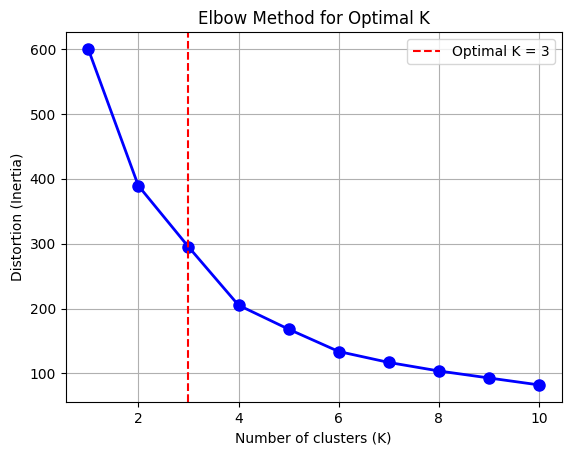

In [81]:
# Elbow method to choose the optimal K
distortions = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    distortions.append(kmeans.inertia_)

# Plotting the Elbow curve with a smooth line and grid
plt.plot(K_range, distortions, marker='o', linestyle='-', color='b', linewidth=2, markersize=8)
plt.axvline(x=3, color='r', linestyle='--', label='Optimal K = 3')  # Highlight the optimal K
plt.xlabel('Number of clusters (K)')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.legend()
plt.show()


Applying K-Means Clustering

In [82]:

features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']  # Specify relevant columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])
# Apply K-Means with K=3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(df_scaled)
# Print the cluster labels
print("Cluster Labels:")
print(kmeans.labels_)

# Print the dataset with cluster labels added
print("\nDataset with Cluster Labels:")
print(df.head())  # Display the first few rows of the dataset


# Add the cluster labels to the dataframe
df['Cluster'] = kmeans.labels_


Cluster Labels:
[0 0 0 0 0 0 0 0 2 0 2 0 2 0 0 0 0 0 2 0 0 0 2 0 2 0 2 0 0 0 2 0 2 0 2 0 2
 0 0 0 2 0 2 0 2 0 2 0 0 0 2 0 0 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 0 0 2 2 2 2
 2 0 2 2 0 2 2 0 2 2 0 2 2 0 0 2 2 0 2 2 0 0 2 0 2 0 0 2 2 0 2 0 2 2 2 2 2
 0 2 0 0 0 2 2 2 2 0 2 1 1 0 1 2 1 2 1 2 1 0 1 0 1 2 1 0 1 2 1 0 1 0 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 1 1]

Dataset with Cluster Labels:
   Gender       Age  Annual Income (k$)  Spending Score (1-100)
0    Male -1.424569           -1.738999               -0.434801
1    Male -1.281035           -1.738999                1.195704
2  Female -1.352802           -1.700830               -1.715913
3  Female -1.137502           -1.700830                1.040418
4  Female -0.563369           -1.662660               -0.395980


Visualizing the Clusters

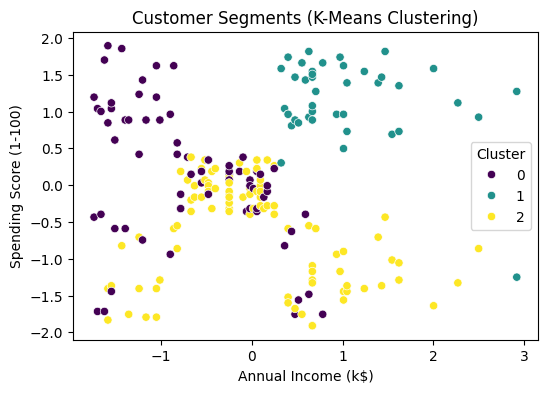

In [83]:
# Visualizing the clusters
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='viridis') # Changed 'data' to 'df'
plt.title('Customer Segments (K-Means Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

 Cluster Analysis and Profiling


In [84]:
# Step 1: Identify numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Step 2: Group by 'Cluster' and calculate the mean values for numerical columns
cluster_profiles = df.groupby('Cluster')[numerical_columns].mean()

# Step 3: Display the cluster profiles
print(cluster_profiles)


              Age  Annual Income (k$)  Spending Score (1-100)  Cluster
Cluster                                                               
0       -0.933811           -0.679798                0.133820      0.0
1       -0.430338            1.022233                1.155936      1.0
2        0.891681            0.047414               -0.620804      2.0


Silhouette

In [86]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(df_scaled, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.357793388710272


Graph for silhouette score

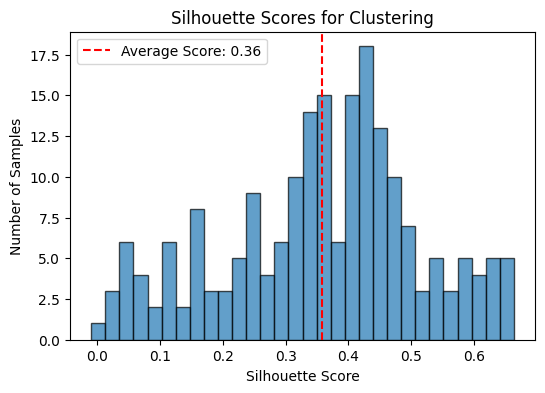

In [87]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Plot silhouette scores for each sample
sample_silhouette_values = silhouette_samples(df_scaled, kmeans.labels_)

plt.figure(figsize=(6, 4))
plt.hist(sample_silhouette_values, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(x=silhouette_avg, color='red', linestyle='--', label=f'Average Score: {silhouette_avg:.2f}')
plt.title('Silhouette Scores for Clustering')
plt.xlabel('Silhouette Score')
plt.ylabel('Number of Samples')
plt.legend()
plt.show()


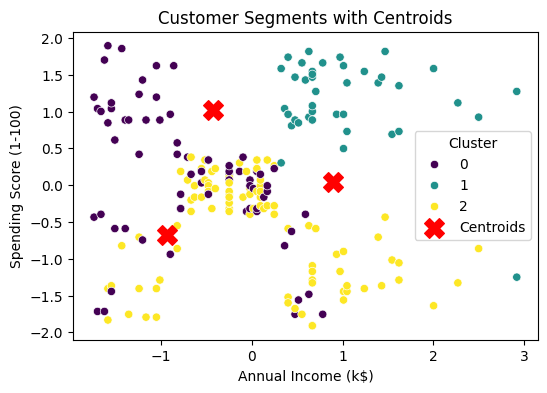

In [88]:
# Visualize the cluster centroids
centroids = kmeans.cluster_centers_

plt.figure(figsize=(6, 4))
# Changed 'data' to 'df' to reference the correct DataFrame
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('Customer Segments with Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

In [89]:
# Calculate the size of each cluster
cluster_sizes = np.bincount(kmeans.labels_) # Use kmeans.labels_ instead of 'clusters'
for i, size in enumerate(cluster_sizes):
    print(f"Cluster {i} size: {size}")

Cluster 0 size: 68
Cluster 1 size: 41
Cluster 2 size: 91
